Sprintの目的
スクラッチを通してニューラルネットワークの基礎を理解する
画像データの扱い方を知る

ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。


《データセットをダウンロードするコード》


1
2
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

《MNISTとは？》


画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。


《画像データとは？》


デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。


データセットの確認
どういったデータなのかを見てみます。


《サンプルコード》


1
2
3
4
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

各データは28×28ピクセルの白黒画像です。


平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。すべてのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。


《サンプルコード》


1
2
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

《補足》


ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。


画像データの可視化
画像データを可視化します。plt.imshowに渡します。


《サンプルコード》


1
2
3
4
5
6
7
8
9
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

numpy.reshape — NumPy v1.17 Manual


matplotlib.pyplot.imshow — Matplotlib 3.1.1 documentation


《発展的話題》


画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどとまったく同じ風に表示されます。


1
2
3
4
5
6
7
8
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。


1
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。


前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。


《サンプルコード》


1
2
3
4
5
6
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。


《サンプルコード》


1
2
3
4
5
6
7
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

sklearn.preprocessing.OneHotEncoder — scikit-learn 0.21.3 documentation


さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。


《サンプルコード》


1
2
3
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

3.ニューラルネットワークスクラッチ

ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。


以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。


《雛形》


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pass
        return

ミニバッチ処理
これまでの機械学習スクラッチでは、すべてのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練データを一度すべて見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。


これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。


《コード》


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。


1
2
3
4
5
6
7
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

__getitem__や__next__は__init__と同じ特殊メソッドの一種です。


学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。




【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値はさまざまな方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。


《サンプルコード》


1
2
3
4
5
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

numpy.random.randn — NumPy v1.15 Manual



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

前処理 画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。 以下のコードで変換可能です。

《サンプルコード》

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

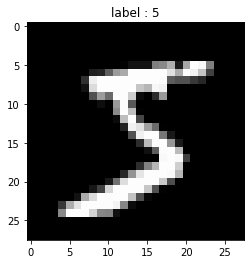

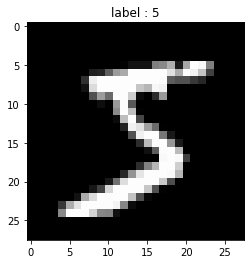

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

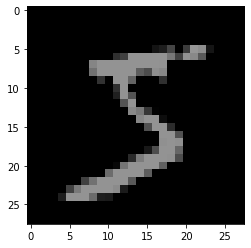

In [ ]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

plt.imshow(image, 'gray', vmin = 0, vmax = 255)


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [ ]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [ ]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([2, 9, 9, 4, 7, 8, 6, 9, 5, 9, 0, 4, 0, 1, 2, 7, 9, 0, 5, 8],
      dtype=uint8))


In [ ]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

In [ ]:
def __init__(self, verbose = True):
    self.verbose = verbose

    self.batch_size = 20 # バッチサイズ
    self.n_features = 784 # 特徴量の数
    self.n_nodes1 = 400 # 1層目のノード数
    self.n_nodes2 = 200 # 2層目のノード数
    self.n_output = 10 # 出力のクラス数（3層目のノード数）

    self.sigma = 0.01 # ガウス分布の標準偏差

    self.network = {} 
    self.network['W1'] = sigma * np.random.randn(n_features, n_nodes1)
    self.network['W2'] = sigma * np.random.randn(n_nodes1, n_nodes2)        
    self.network['W3'] = sigma * np.random.randn(n_nodes2, n_output)    
    
    # Xavierの初期値
    # network['W1'] = np.random.rand(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
    # network['W2'] = np.random.rand(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
    
    # Heの初期値
    # network['W1'] = np.random.rand(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    # network['W2'] = np.random.rand(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)

    network['b1'] = np.zeros(n_nodes1)
    network['b2'] = np.zeros(n_nodes2)
    network['b3'] = np.zeros(output_layer_size)

【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。


batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

「1層目」


A
1
=
X
⋅
W
1
+
B
1

$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


$B_1$ : 1層目のバイアス (n_nodes1,)


$A_1$ : 出力 (batch_size, n_nodes1)


「1層目の活性化関数」


Z
1
=
f
(
A
1
)

$f()$ : 活性化関数


$Z_1$ 出力 (batch_size, n_nodes1)


「2層目」


A
2
=
Z
1
⋅
W
2
+
B
2

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


$B_2$ : 2層目のバイアス (n_nodes2,)


$A_2$ : 出力 (batch_size, n_nodes2)


「2層目の活性化関数」


Z
2
=
f
(
A
2
)

$f()$ : 活性化関数


$Z_2$ 出力 (batch_size, n_nodes2)


「3層目（出力層）」


A
3
=
Z
2
⋅
W
3
+
B
3

$W_3$ : 3層目の重み (n_nodes2, n_output)


$B_3$ : 3層目のバイアス (n_output,)


$A_3$ : 出力 (batch_size, n_output)


「3層目の活性化関数」


Z
3
=
s
o
f
t
m
a
x
(
A
3
)

$softmax()$ : ソフトマックス関数


$Z_3$ 出力 (batch_size, n_output)


$Z_3$ は各ラベル（0〜9）に対する確率の配列である。


活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。


「シグモイド関数」


f
(
Z
)
=
s
i
g
m
o
i
d
(
A
)
=
1
1
+
e
x
p
(
−
A
)

指数関数 $exp(-A)$ の計算はnp.expを使用してください。


numpy.exp — NumPy v1.15 Manual


「ハイパボリックタンジェント関数」


次の数式で表されますが、np.tanhひとつで実現できます。


f
(
Z
)
=
t
a
n
h
(
A
)
=
e
x
p
(
A
)
−
e
x
p
(
−
A
)
e
x
p
(
A
)
+
e
x
p
(
−
A
)

numpy.tanh — NumPy v1.15 Manual


＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。


ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。


次の数式です。


Z
3
_
k
=
e
x
p
(
A
3
_
k
)
∑
n
c
i
=
1
e
x
p
(
A
3
_
i
)

$Z_{3_k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)


$A_{3_k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)


$n_c$ : クラスの数、n_output。今回のMNISTでは10。


分母はすべてのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$ 番目のクラスである確率が求まります。


これを10クラス分計算し、合わせたものが $Z_3$ です。



In [ ]:
class functions():
    # 中間層の活性化関数
    # シグモイド関数（ロジスティック関数）
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    # ReLU関数
    def relu(self, x):
        return np.maximum(0, x)

    # ステップ関数（閾値0）
    def step_function(self, x):
        return np.where( x > 0, 1, 0) 

    # 出力層の活性化関数
    # ソフトマックス関数
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T

        x = x - np.max(x) # オーバーフロー対策
        return np.exp(x) / np.sum(np.exp(x))

    # ソフトマックスとクロスエントロピーの複合関数
    def softmax_with_loss(self, d, x):
        y = softmax(x)
        return cross_entropy_error(d, y)

    # 誤差関数
    # 最小二乗法
    def least_square(self, d, y):
        return np.sum(np.square(d - y)) / 2

    # クロスエントロピー
    def cross_entropy_error(self, d, y):
        if y.ndim == 1:
            d = d.reshape(1, d.size)
            y = y.reshape(1, y.size)

        # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
        if d.size == y.size:
            d = d.argmax(axis=1)

        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size



    # 活性化関数の導関数
    # シグモイド関数（ロジスティック関数）の導関数
    def d_sigmoid(self, x):
        dx = (1.0 - self.sigmoid(x)) * self.sigmoid(x)
        return dx

    # ReLU関数の導関数
    def d_relu(self, x):
        return np.where( x > 0, 1, 0)

    # ステップ関数の導関数
    def d_step_function(self, x):
        return 0

    # 最小二乗法の導関数
    def d_least_square(d, y):
        return y - d


    # ソフトマックスとクロスエントロピーの複合導関数
    def d_softmax_with_loss(self, d, y):
        batch_size = d.shape[0]
        if d.size == y.size: # 教師データがone-hot-vectorの場合
            dx = (y - d) / batch_size
        else:
            dx = y.copy()
            dx[np.arange(batch_size), d] -= 1
            dx = dx / batch_size
        return dx

    # シグモイドとクロスエントロピーの複合導関数
    def d_sigmoid_with_loss(self, d, y):
        return y - d

    # 数値微分
    def numerical_gradient(self, f, x):
        h = 1e-4
        grad = np.zeros_like(x)

        for idx in range(x.size):
            tmp_val = x[idx]
            # f(x + h)の計算
            x[idx] = tmp_val + h
            fxh1 = f(x)

            # f(x - h)の計算
            x[idx] = tmp_val - h
            fxh2 = f(x)

            grad[idx] = (fxh1 - fxh2) / (2 * h)
            # 値を元に戻す
            x[idx] = tmp_val

        return grad

順伝播の実装



In [ ]:
# 順伝播
def forward(network, x, activation ="sigmoid" ):
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3  = network['b1'], network['b2'], network['b3']
    
    # インスタンス作成
    functions = functions()
    
    if activation == "sigmoid":
        # 第１層への入力
        A1 =  np.dot(x, W1) + b1
        # 第１層の出力（第１層の入力を活性化関数に通す）
        Z1 = functions.sigmoid(A1)

        # 第２層への入力
        A2 =  np.dot(Z1, W2) + b2
        # 第２層の出力（第２層の入力を活性化関数に通す）
        Z2 = functions.sigmoid(A2) 
    
    
    elif activation == "tanh":
        # 第１層への入力
        A1 =  np.dot(x, W1) + b1
        # 第１層の出力（第１層の入力を活性化関数に通す）
        Z1 = np.tanh(A1)

        # 第２層への入力
        A2 =  np.dot(Z1, W2) + b2
        # 第２層の出力（第２層の入力を活性化関数に通す）
        Z2 = np.tanh(A2)  
        
    elif activation == "relu" :
        # 第１層への入力
        A1 =  np.dot(x, W1) + b1
        # 第１層の出力（第１層の入力を活性化関数に通す）
        Z1 = functions.relu(A1)

        # 第２層への入力
        A2 =  np.dot(Z1, W2) + b2
        # 第２層の出力（第２層の入力を活性化関数に通す）
        Z2 = functions.relu(A2)   
    
    # 第３層への入力
    A3 =  np.dot(Z2, W3) + b3
    # 出力層への出力
    y_pred = functions.softmax(A3)
 
    return Z1, Z2, y_pred

【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。
$$
L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})
$$

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）


$n_{b}$ : バッチサイズ、batch_size


$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。


実数におけるlog(x)の定義域は0 < xです。したがって、logの中身がとても小さい値になってしまったときエラーを起こします。そこでlogの中に1e-7を足すことでエラーを回避できます。


こういった処理はlogに限らず、さまざまな場所で出てくることがあります。

In [ ]:
# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)

    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。

$$
W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\
B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的にはすべて同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。


「3層目」
$$
\frac{\partial L}{\partial A_3} = \frac{1}{n_b}(Z_{3} - Y)\\
\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\
\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T
$$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)


$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)


$Y$ : 正解ラベル (batch_size, n_output)


$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)


$W_3$ : 3層目の重み (n_nodes2, n_output)


$n_{b}$ : バッチサイズ、batch_size


「2層目」

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\
\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\
\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T
$$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$A_2$ : 2層目の出力 (batch_size, n_nodes2)


$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)


$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


「1層目」
$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\
\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\
$$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)


$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_nodes1,)


$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)


$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$A_1$ : 1層目の出力 (batch_size, n_nodes1)


$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


《補足》


活性化関数にシグモイド関数を使用した場合は、次のようになります。

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot  \{1-sigmoid(A_{2})\}sigmoid(A_{2})
\\
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot  \{1-sigmoid(A_{1})\}sigmoid(A_{1})
$$

In [ ]:
# 誤差逆伝播
def backward(x, y, z1, z2, y_pred, activation ="sigmoid" ):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']   
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(y, y_pred)
    
    if activation == "sigmoid":
        # b3の勾配
        grad['b3'] = np.sum(delta3, axis=0)

        # W3の勾配
        grad['W3'] = np.dot(z2.T, delta3)
        
        # 2層でのデルタ
        delta2 = np.dot(delta3, W3.T) * functions.d_sigmoid(z2)
        
        # b2の勾配
        grad['b2'] = np.sum(delta2, axis=0)

        # W2の勾配
        grad['W2'] = np.dot(z1.T, delta2)

        # 1層でのデルタ
        delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

        # b1の勾配
        grad['b1'] = np.sum(delta1, axis=0)

        # W1の勾配
        grad['W1'] = np.dot(x.T, delta1)
        
    elif activation == "relu":
        # b2の勾配
        grad['b2'] = np.sum(delta2, axis=0)

        # W2の勾配
        grad['W2'] = np.dot(z1.T, delta2)

        # 1層でのデルタ
        delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

        # b1の勾配
        grad['b1'] = np.sum(delta1, axis=0)

        # W1の勾配
        grad['W1'] = np.dot(x.T, delta1)
    

    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]
    
    return grad

In [ ]:
def fit(self, X, y, X_val=None, y_val=None):
    """
    ニューラルネットワーク分類器を学習する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """

    epoc = 10
    # ▼▼▼　メイン処理
    for i in range(epoc):
        # ミニバッチ取得
        get_mini_batch = GetMiniBatch(X, y_train, batch_size=20)
        print(len(get_mini_batch)) # 2400
        print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
        for mini_X_train, mini_y_train in get_mini_batch:
            # このfor文内でミニバッチが使える

            z1, z2, y_pred = forward(network, mini_X_train)
            grad = backward(mini_X_train, mini_y_train, z1, z2, y_pred)

    if self.verbose:
        #verboseをTrueにした際は学習過程などを出力する
        print()

【問題5】推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。


numpy.argmax — NumPy v1.17 Manual

In [ ]:
def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        z1, z2, y_pred = forward(network, X)
        
        return y_pred

以上をクラスタ化する

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, verbose = True, activation = "sigmoid", initialize = "None", optimaizer = "SGD", epoc = 50, lr = 0.001, sigma = 1):
        self.verbose = verbose
        
        self.batch_size = 20 # バッチサイズ
        self.n_features = 784 # 特徴量の数
        self.n_nodes1 = 400 # 1層目のノード数
        self.n_nodes2 = 200 # 2層目のノード数
        self.n_output = 10 # 出力のクラス数（3層目のノード数）
        
        self.sigma = sigma # ガウス分布の標準偏差
        
        self.network = {} 
        if initialize == "None":
            self.network['W1'] = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
            self.network['W2'] = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)        
            self.network['W3'] = self.sigma * np.random.randn(self.n_nodes2, self.n_output)  
            
        elif  initialize == "Xavier":
            # Xavierの初期値
            self.network['W1'] = np.random.rand(self.n_features, self.n_nodes1) / np.sqrt(self.n_features)
            self.network['W2'] = np.random.rand(self.n_nodes1, self.n_nodes2) / np.sqrt(self.n_nodes1)
            self.network['W3'] = np.random.rand(self.n_nodes2, self.n_output) / np.sqrt(self.n_nodes2)
            
        elif  initialize == "He":
            # Xavierの初期値
            self.network['W1'] = np.random.rand(self.n_features, self.n_nodes1) / np.sqrt(self.n_features) * np.sqrt(2)
            self.network['W2'] = np.random.rand(self.n_nodes1, self.n_nodes2) / np.sqrt(self.n_nodes1) * np.sqrt(2)
            self.network['W3'] = np.random.rand(self.n_nodes2, self.n_output) / np.sqrt(self.n_nodes2) * np.sqrt(2)
            

        
        self.network['b1'] = np.zeros(self.n_nodes1)
        self.network['b2'] = np.zeros(self.n_nodes2)
        self.network['b3'] = np.zeros(self.n_output)
        # self.learning_rate = 0.0002
        self.learning_rate = lr
        self.epoc = epoc
        self.activation = activation
        self.func = functions() 
        self.train_loss_list = []
        self.test_loss_list = []
        self.plot_interval = 100
        self.optimaizer = optimaizer
        self.h = {}
        self.m = {}
        self.v = {}        
        
        print("self.learning_rate = ", self.learning_rate)
        print("self.activation = ", self.activation)
        print("self.optimaizer = ", self.optimaizer)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        print("Learning Start!")
        
        # one-hot-vectol化
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y[:, np.newaxis])
        
        if y_val is not None:
            y_test_one_hot = enc.transform(y_val[:, np.newaxis])
        
        # 学習回数のカウンタ
        learning_cnt = 0
        
        for i in range(self.epoc):
            # ミニバッチ取得
            get_mini_batch = GetMiniBatch(X, y_train_one_hot, batch_size = self.batch_size)
            
            # すべてのミニバッチを抜ける前に直前の値をバックアップしておく(グラフ用に)
            bk_mini_y_train = 0
            bk_y_pred = 0
            train_loss_batch = []
            test_loss_batch = []
            for mini_X_train, mini_y_train in get_mini_batch:
                # このfor文内でミニバッチが使える
                
                z1, z2, y_pred = self._forward(self.network, mini_X_train, activation = self.activation)                
                grad = self._backward(learning_cnt, mini_X_train, mini_y_train, z1, z2, y_pred, activation = self.activation)
                
                learning_cnt += 1
                
                # ミニバッチ内のロスを格納
                train_loss_batch.append(self.func.cross_entropy_error(mini_y_train, y_pred))
     

            # loss計算
            # ミニバッチ内のロスの平均を取る
            train_loss_mean = np.array(train_loss_batch).mean()
            self.train_loss_list.append(train_loss_mean)

            # test_loss の初期化
            test_loss = 0
            if X_val is not None:
                z1, z2, y_test_pred = self._forward(self.network, X_val)
                test_loss = self.func.cross_entropy_error(y_test_one_hot, y_test_pred)
                #self.test_loss_list.append(self.func.cross_entropy_error(y_test_one_hot, y_test_pred))
                self.test_loss_list.append(test_loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                print("Epoc Count = {}, train_loss = {}, test_loss = {}".format(i+1, train_loss_mean, test_loss))
                
        print("Learning Finish!")

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        z1, z2, y_pred = self._forward(self.network, X)

        y_pred = np.argmax(y_pred, axis = 1)
        return y_pred
    
    

    # 順伝播
    def _forward(self, network, x, activation ="sigmoid" ):

        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']

        if activation == "sigmoid":
            # 第１層への入力
            A1 =  np.dot(x, W1) + b1
            # 第１層の出力（第１層の入力を活性化関数に通す）
            Z1 = self.func.sigmoid(A1)

            # 第２層への入力
            A2 =  np.dot(Z1, W2) + b2
            # 第２層の出力（第２層の入力を活性化関数に通す）
            Z2 = self.func.sigmoid(A2) 

        elif activation == "tanh":
            # 第１層への入力
            A1 =  np.dot(x, W1) + b1
            # 第１層の出力（第１層の入力を活性化関数に通す）
            Z1 = np.tanh(A1)

            # 第２層への入力
            A2 =  np.dot(Z1, W2) + b2
            # 第２層の出力（第２層の入力を活性化関数に通す）
            Z2 = np.tanh(A2)  

        elif activation == "relu" :
            # 第１層への入力
            A1 =  np.dot(x, W1) + b1
            # 第１層の出力（第１層の入力を活性化関数に通す）
            Z1 = self.func.relu(A1)

            # 第２層への入力
            A2 =  np.dot(Z1, W2) + b2
            # 第２層の出力（第２層の入力を活性化関数に通す）
            Z2 = self.func.relu(A2)   

        # 第３層への入力
        A3 =  np.dot(Z2, W3) + b3
        # 出力層への出力
        y_pred = self.func.softmax(A3)

        return Z1, Z2, y_pred

    # 誤差逆伝播
    def _backward(self, i, x, y, z1, z2, y_pred, activation ="sigmoid" ):
        grad = {}

        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']   

        # 出力層でのデルタ
        delta3 = self.func.d_softmax_with_loss(y, y_pred)

        if activation == "sigmoid":
            # b3の勾配
            grad['b3'] = np.sum(delta3, axis=0)

            # W3の勾配
            grad['W3'] = np.dot(z2.T, delta3)

            # 2層でのデルタ
            delta2 = np.dot(delta3, W3.T) * self.func.d_sigmoid(z2)

            # b2の勾配
            grad['b2'] = np.sum(delta2, axis=0)

            # W2の勾配
            grad['W2'] = np.dot(z1.T, delta2)

            # 1層でのデルタ
            delta1 = np.dot(delta2, W2.T) * self.func.d_sigmoid(z1)

            # b1の勾配
            grad['b1'] = np.sum(delta1, axis=0)

            # W1の勾配
            grad['W1'] = np.dot(x.T, delta1)

            
        elif activation == "relu":
            # b3の勾配
            grad['b3'] = np.sum(delta3, axis=0)

            # W3の勾配
            grad['W3'] = np.dot(z2.T, delta3)
            
            # 2層でのデルタ
            delta2 = np.dot(delta3, W3.T) * self.func.d_relu(z2)
            
            # b2の勾配
            grad['b2'] = np.sum(delta2, axis=0)

            # W2の勾配
            grad['W2'] = np.dot(z1.T, delta2)

            # 1層でのデルタ
            delta1 = np.dot(delta2, W2.T) * self.func.d_relu(z1)

            # b1の勾配
            grad['b1'] = np.sum(delta1, axis=0)

            # W1の勾配
            grad['W1'] = np.dot(x.T, delta1)

     
        # =========================================================
         # パラメータに勾配適用
        if self.optimaizer == "AdaGrad":
        # AdaGrad =====================================================
            # if i == 0:
                # self.h = {}
            for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
                if i == 0:
                    self.h[key] = np.zeros_like(self.network[key])
                self.h[key] += np.square(grad[key])
                self.network[key] -= self.learning_rate * grad[key] / (np.sqrt(self.h[key]) + 1e-7)  
                
        # =========================================================
         # パラメータに勾配適用
        elif self.optimaizer == "Adam":
        # Adam ====================================================
            # print("i = ", i)
            beta1 = 0.9
            beta2 = 0.999 
            # if i == 0:
                # self.m = {}
                # self.v = {}
            learning_rate_t  = self.learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
            for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
                if i == 0:
                    self.m[key] = np.zeros_like(self.network[key])
                    self.v[key] = np.zeros_like(self.network[key])

                self.m[key] += (1 - beta1) * (grad[key] - self.m[key])
                self.v[key] += (1 - beta2) * (grad[key] ** 2 - self.v[key])            
                self.network[key] -= learning_rate_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)   
                
                
        else:
            # その他はすべてSGDにする
            # SGD =====================================================
            for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
                self.network[key]  -= self.learning_rate * grad[key]                
                
                
        return grad


4.検証

【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。



In [ ]:
ScratchMNIST = ScratchSimpleNeuralNetrowkClassifier(verbose = True, activation = "sigmoid", epoc = 50, lr = 0.08, sigma = 0.05)

self.learning_rate =  0.08
self.activation =  sigmoid
self.optimaizer =  SGD


In [ ]:
ScratchMNIST.fit(X_train, y_train, X_test, y_test)

Learning Start!
Epoc Count = 1, train_loss = 0.9630347468515401, test_loss = 0.3959620794360402
Epoc Count = 2, train_loss = 0.360315588067102, test_loss = 0.3110944988009129
Epoc Count = 3, train_loss = 0.3062483971814988, test_loss = 0.2794866796444407
Epoc Count = 4, train_loss = 0.2810605213886924, test_loss = 0.2637220112301405
Epoc Count = 5, train_loss = 0.26646607806906836, test_loss = 0.2548478470469067
Epoc Count = 6, train_loss = 0.25649221011671264, test_loss = 0.2493159995769047
Epoc Count = 7, train_loss = 0.24898381698860395, test_loss = 0.24560450399913275
Epoc Count = 8, train_loss = 0.24300176996250344, test_loss = 0.24297265701086534
Epoc Count = 9, train_loss = 0.23802871516144375, test_loss = 0.24099797330183473
Epoc Count = 10, train_loss = 0.23374049601440097, test_loss = 0.23941497255188243
Epoc Count = 11, train_loss = 0.2299210824824915, test_loss = 0.23805232126106726
Epoc Count = 12, train_loss = 0.22642279581292124, test_loss = 0.23680036731585297
Epoc Coun

In [ ]:
y_pred = ScratchMNIST.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, output_dict=True)

# pandas.DataFrameへ変換
df_cr = pd.DataFrame(cr)
df_cr

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.952522,0.975546,0.942363,0.905983,0.917795,0.971250,0.949223,0.958539,0.932712,0.946502,0.9449,0.945244,0.945412
recall,0.982653,0.984141,0.950581,0.944554,0.966395,0.871076,0.956159,0.944553,0.925051,0.911794,0.9449,0.943696,0.944900
f1-score,0.967353,0.979825,0.946454,0.924867,0.941468,0.918440,0.952678,0.951494,0.928866,0.928824,0.9449,0.944027,0.944743
support,980.000000,1135.000000,1032.000000,1010.000000,982.000000,892.000000,958.000000,1028.000000,974.000000,1009.000000,0.9449,10000.000000,10000.000000


accuracyは、94%となった。

【問題7】学習曲線のプロット
学習曲線をプロットしてください。


ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。



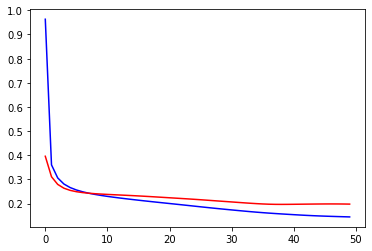

In [ ]:
plt.plot(range(len(ScratchMNIST.train_loss_list)), ScratchMNIST.train_loss_list, color = "blue")
plt.plot(range(len(ScratchMNIST.test_loss_list)), ScratchMNIST.test_loss_list, color = "red")